<a href="https://colab.research.google.com/github/SharatGupta/DSML-Projects/blob/main/Walmart%20CI%20%26%20CLT%20Case%20Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Walmart**

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

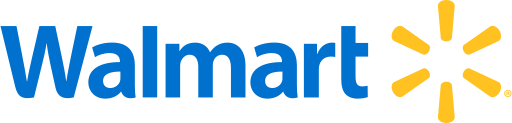

# **Business Problem**

Analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions.

* Analyze spending habits difference between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female)

* Perform the same activity for Married vs Unmarried and Age

* Finally calculate confidence intervals for each analysis

* Give Bussiness Insights & Recommendations to make changes or improvements

# **Desired Outcome of Analysis**

* Average spend based on Gender, Age, Marital status and other paramaeters
* Find Population mean, 90%,95%,99% Confidence intervals using Centre Limit Theorem  for all above paramters








# **Data Import and Basic Metric Analysis**

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [49]:
data = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv")

# "dataC" - This will be used for changing some Numerical to Categorical,
# Whereas "data" will be used for Correlation, scatterplot & whereever indepth analysis required

We will Group the Data by ["User_ID","Gender","Age","Occupation","City_Category","Stay_In_Current_City_Years","Marital_Status"] and sum the Purchase values as need for Business Problem

In [50]:
data = data.groupby(["User_ID","Gender","Age","Occupation","City_Category","Stay_In_Current_City_Years","Marital_Status"])["Purchase"].sum().reset_index()

In [51]:
data.shape

(5891, 8)

In [53]:
data.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase
0,1000001,F,0-17,10,A,2,0,334093
1,1000002,M,55+,16,C,4+,0,810472
2,1000003,M,26-35,15,A,3,0,341635
3,1000004,M,46-50,7,B,2,1,206468
4,1000005,M,26-35,20,A,1,1,821001


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5891 entries, 0 to 5890
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   User_ID                     5891 non-null   int64 
 1   Gender                      5891 non-null   object
 2   Age                         5891 non-null   object
 3   Occupation                  5891 non-null   int64 
 4   City_Category               5891 non-null   object
 5   Stay_In_Current_City_Years  5891 non-null   object
 6   Marital_Status              5891 non-null   int64 
 7   Purchase                    5891 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 368.3+ KB


In [55]:
data.columns

Index(['User_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Purchase'],
      dtype='object')

In [56]:
data.index

RangeIndex(start=0, stop=5891, step=1)

In [57]:
data.dtypes

User_ID                        int64
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Purchase                       int64
dtype: object

In [58]:
# Checking Value Count of Each Category
for i in data.columns:
  print(i, "Nunique values :", data[i].nunique(),", Max :", data[i].max(),", Min :",data[i].min())
  print("------------------------------------------------------------------------------------------------")

User_ID Nunique values : 5891 , Max : 1006040 , Min : 1000001
------------------------------------------------------------------------------------------------
Gender Nunique values : 2 , Max : M , Min : F
------------------------------------------------------------------------------------------------
Age Nunique values : 7 , Max : 55+ , Min : 0-17
------------------------------------------------------------------------------------------------
Occupation Nunique values : 21 , Max : 20 , Min : 0
------------------------------------------------------------------------------------------------
City_Category Nunique values : 3 , Max : C , Min : A
------------------------------------------------------------------------------------------------
Stay_In_Current_City_Years Nunique values : 5 , Max : 4+ , Min : 0
------------------------------------------------------------------------------------------------
Marital_Status Nunique values : 2 , Max : 1 , Min : 0
------------------------------------

In [59]:
data.describe()

,User_ID,Occupation,Marital_Status,Purchase
count,5.891000e+03,5891.000000,5891.000000,5.891000e+03
mean,1.003025e+06,8.153285,0.419963,8.650166e+05
std,1.743379e+03,6.323140,0.493594,9.436445e+05
min,1.000001e+06,0.000000,0.000000,4.668100e+04
25%,1.001518e+06,3.000000,0.000000,2.376780e+05
50%,1.003026e+06,7.000000,0.000000,5.212130e+05
75%,1.004532e+06,14.000000,1.000000,1.119250e+06
max,1.006040e+06,20.000000,1.000000,1.053691e+07


In [60]:
data.describe(include = object)

,Gender,Age,City_Category,Stay_In_Current_City_Years
count,5891,5891,5891,5891
unique,2,7,3,5
top,M,26-35,C,1
freq,4225,2053,3139,2086


In [61]:
for i in data.columns:
  print(data[i].value_counts())
  print("-------------------------------------")

1000001    1
1004026    1
1004035    1
1004034    1
1004033    1
          ..
1002018    1
1002017    1
1002016    1
1002015    1
1006040    1
Name: User_ID, Length: 5891, dtype: int64
-------------------------------------
M    4225
F    1666
Name: Gender, dtype: int64
-------------------------------------
26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55+       372
0-17      218
Name: Age, dtype: int64
-------------------------------------
4     740
0     688
7     669
1     517
17    491
12    376
14    294
20    273
2     256
16    235
6     228
10    192
3     170
15    140
13    140
11    128
5     111
9      88
19     71
18     67
8      17
Name: Occupation, dtype: int64
-------------------------------------
C    3139
B    1707
A    1045
Name: City_Category, dtype: int64
-------------------------------------
1     2086
2     1145
3      979
4+     909
0      772
Name: Stay_In_Current_City_Years, dtype: int64
-------------------------------------
0    3417
1

* There are 5891 unique customers from
* Customer are of both M & F gender
* There are customers from 7 different age groups
* Customer are from 21 Different Occupations
* Customers comprise of both mariied & Singles
* Customer comprise of all 3 City Categories
* Customer Stay in Current City varies from 0 to 4+ Years
* Customer Purchase value varies from 46681 ~ 10536909 $

# **Data Cleaning - Duplicates,Null Values & Outliers**

## Duplicates

In [62]:
data.duplicated().sum()

0

In [63]:
data.drop_duplicates(inplace= True)

No Duplicates Rows Found

## Null Values

In [64]:
data.isna().sum(axis=0)

User_ID                       0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Purchase                      0
dtype: int64

No "NAN" found in Data

## Outliers

* Outliers can be found in Purchase value with Respect to Age, Gender, Marital Status & other Features
* We will visualize the outliers using boxplot
* We will drop the outliers in the later section, when we find the Confidence interval for each category individually

<Axes: xlabel='Age', ylabel='Purchase'>

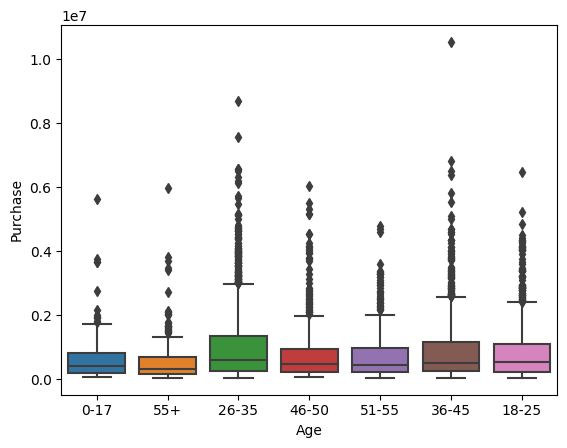

In [65]:
sns.boxplot(data= data, x= "Age", y= "Purchase")

* Median of Age group 26-35  is the highest & next is 18-25

<Axes: xlabel='Gender', ylabel='Purchase'>

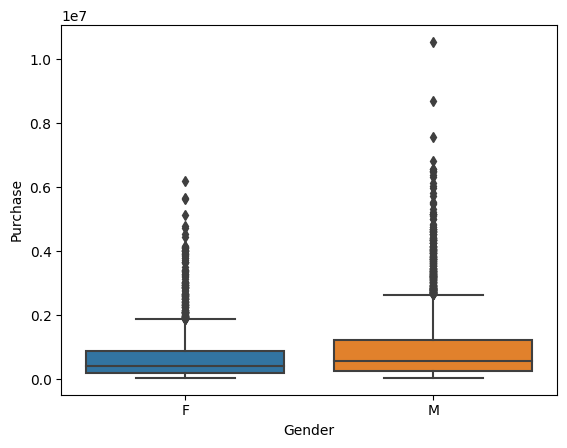

In [66]:
sns.boxplot(data= data, x= "Gender", y= "Purchase")

* Median of Male gender is slightly higher than Female gender

<Axes: xlabel='Marital_Status', ylabel='Purchase'>

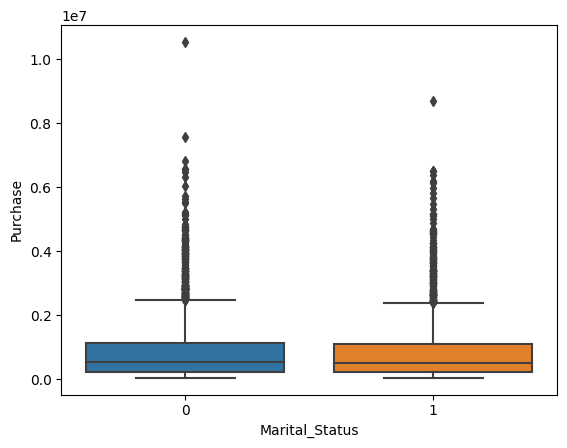

In [67]:
sns.boxplot(data= data, x= "Marital_Status", y= "Purchase")

* Median of Married & Singles is almost same

In [68]:
# Finding outlier for Purchase Feature in Totality
print("Feature : IQR, Lower_Limit, Quantile25, Quantile75, Upper_Limit")
x ="Purchase"
IQR = np.percentile(data[x],75) - np.percentile(data[x],25)
lower_limit = max (np.percentile(data[x],25) - 1.5*IQR,0)
upper_limit = np.percentile(data[x],75) + 1.5*IQR
droplist.extend(list(np.where( (data[x]>upper_limit) | (data[x]<lower_limit) )[0]))
print(x,":", IQR,",",lower_limit,",",np.percentile(data[x],25),",",np.percentile(data[x],75),",",upper_limit)


Feature : IQR, Lower_Limit, Quantile25, Quantile75, Upper_Limit
Purchase : 881571.5 , 0 , 237678.0 , 1119249.5 , 2441606.75


# **Correlation among Data**

In [69]:
data.corr()

<ipython-input-69-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,User_ID,Occupation,Marital_Status,Purchase
User_ID,1.000000,-0.019323,0.002596,0.004456
Occupation,-0.019323,1.000000,0.032028,-0.000420
Marital_Status,0.002596,0.032028,1.000000,-0.019379
Purchase,0.004456,-0.000420,-0.019379,1.000000


<ipython-input-70-48d00ee6b6e4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap = "Greens")


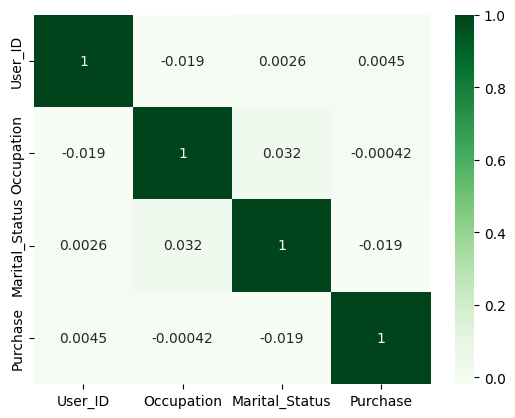

In [70]:
sns.heatmap(data.corr(),annot=True,cmap = "Greens")
plt.show()

All Numeric Features are least Correlated

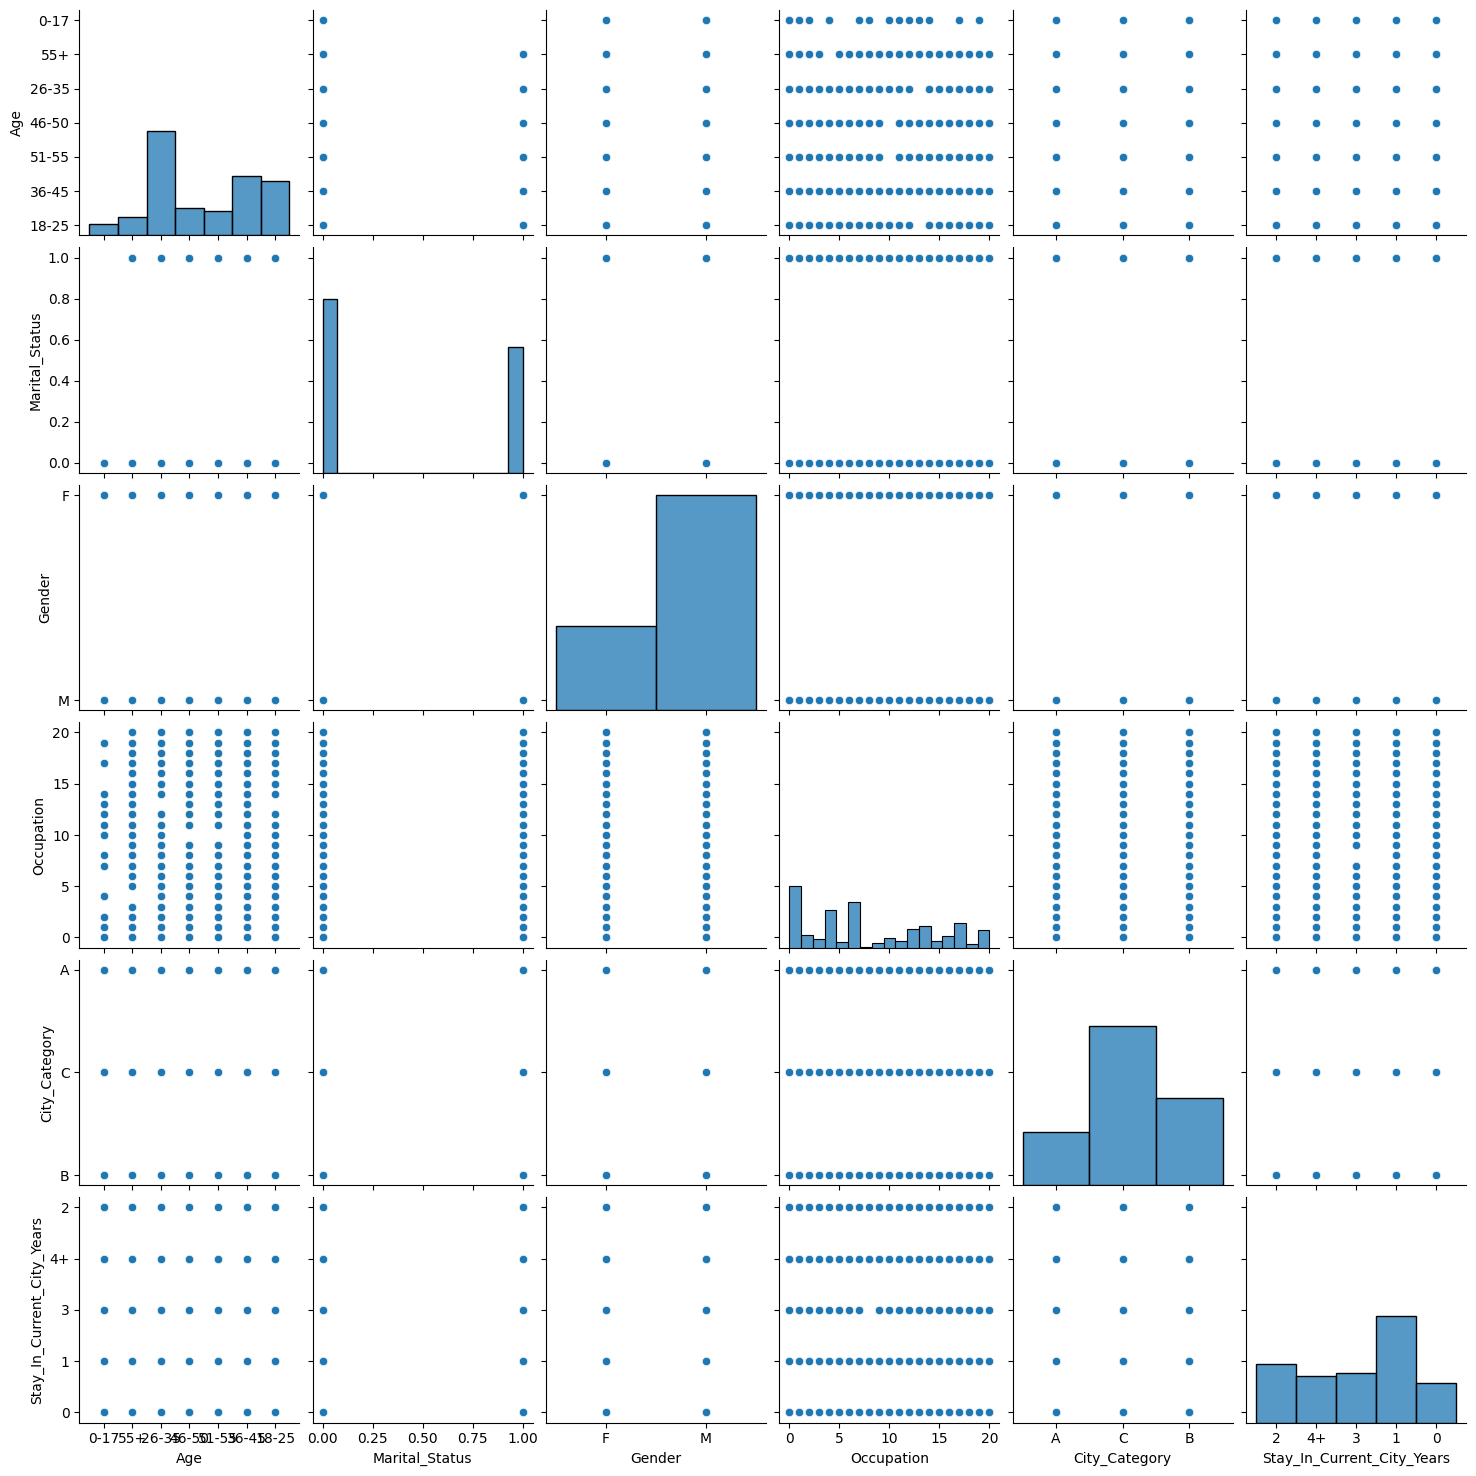

In [71]:
sns.pairplot(data,vars =["Age","Marital_Status","Gender","Occupation","City_Category","Stay_In_Current_City_Years"] )


* Majority of Customers Stay_in Current_City is 1 Year
* Majority of Customer are from C Category City
* Majority of the Customers of Occupation "0"
* Majority of Customers are of Male Gender
* Majority of Customers are of Singles
* majority of Customer are of Age group "26-35"


# **UniVariate, Bivariate Analysis**

In [73]:
data.columns

Index(['User_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Purchase'],
      dtype='object')

**Product**

<function matplotlib.pyplot.show(close=None, block=None)>

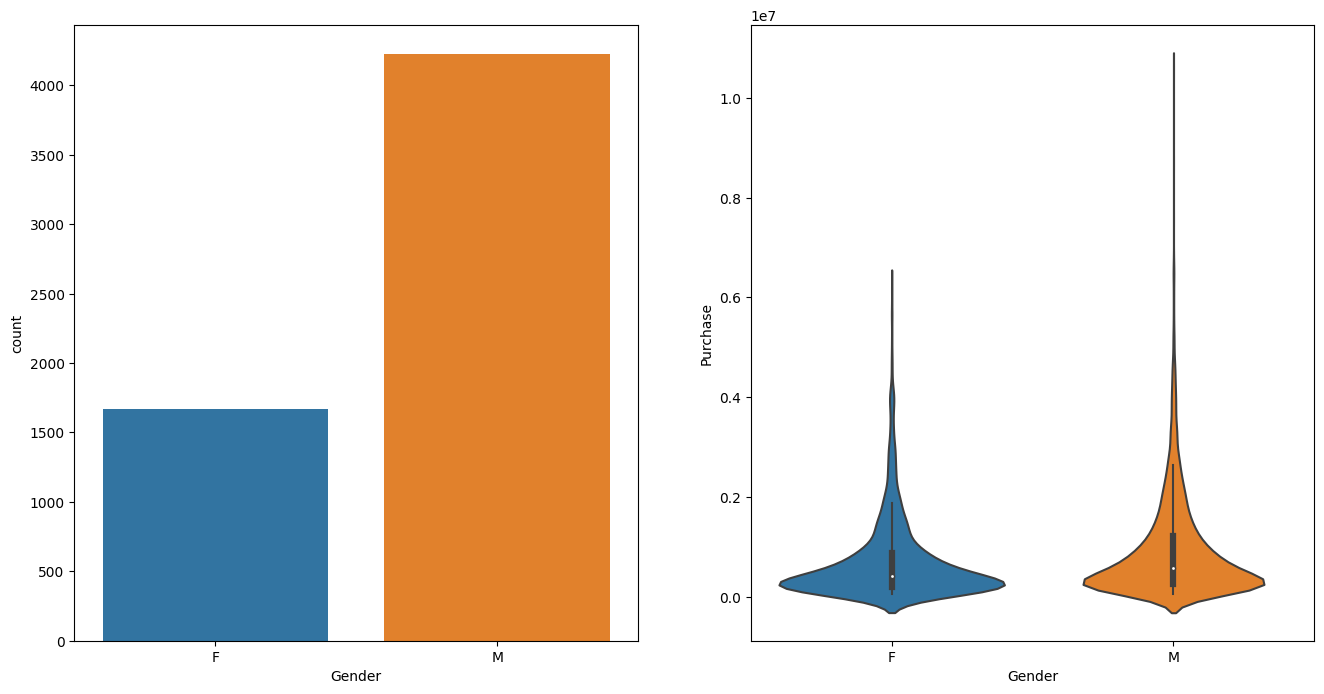

In [75]:
plt.figure(figsize = (16,8))
plt.subplot(1,2,1)
sns.countplot(data=data,x="Gender")
plt.subplot(1,2,2)
sns.violinplot(data=data,y="Purchase",x = "Gender")
plt.show

* Most Sold Product is KP281


**Gender**

<function matplotlib.pyplot.show(close=None, block=None)>

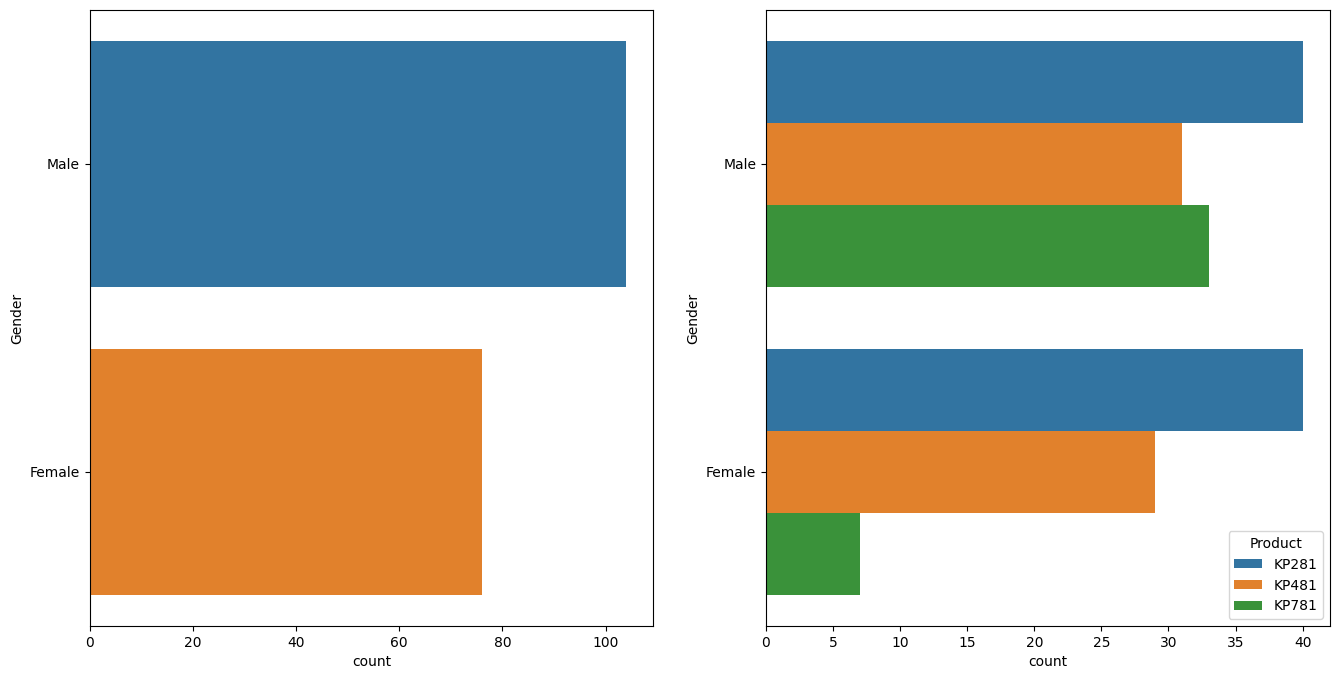

In [ ]:
plt.figure(figsize = (16,8))
plt.subplot(1,2,1)
sns.countplot(data=data,y="Gender")
plt.subplot(1,2,2)
sns.countplot(data=data,y="Gender",hue= "Product")
plt.show

* Male Buy More Product in Aerofit than Female Customers
* Male : Female Ratio of KP281,KP481 is almost same
* But in case of KP781, it is majorly preferred by Male Customers

**Education**

<function matplotlib.pyplot.show(close=None, block=None)>

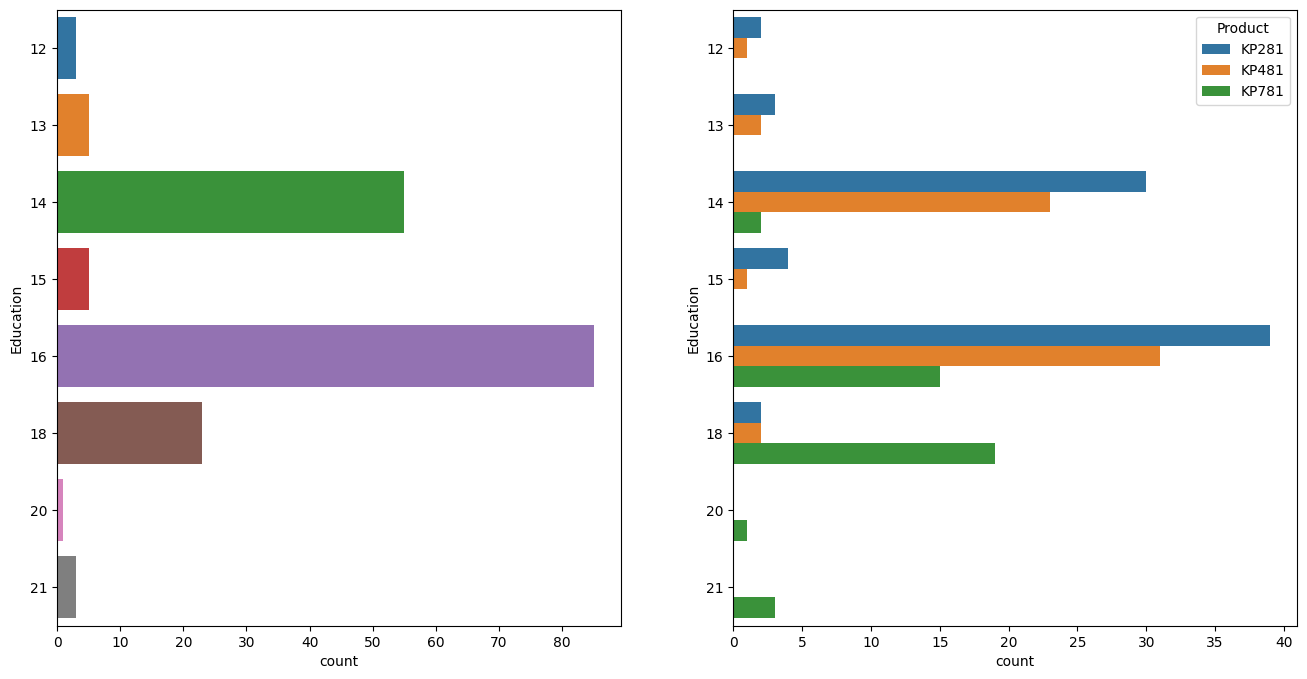

In [ ]:
plt.figure(figsize = (16,8))
plt.subplot(1,2,1)
sns.countplot(data=data,y="Education")
plt.subplot(1,2,2)
sns.countplot(data=data,y="Education",hue= "Product")
plt.show

In [ ]:
dataC["Education"] = pd.cut(data["Education"],bins=[10,12,14,16,18,22],labels=[1,2,3,4,5],right = True)

converting education in year into Categories
* 12  --> 1  (Highser Secondary)
* 13,14 --> 2 (Diploma)
* 15,16 --> 3 (Graduate)
* 18 --> 4 (Post Graduate)
* 20,21 --> 5 (Doctorates)

In [ ]:
#dataC["Education"] = pd.cut(data["Education"],bins=[10,12,14,16,18,22],labels=[Higher Secondary,Diploma,Graduate,Post Graduate,Doctorate],right = True)

<function matplotlib.pyplot.show(close=None, block=None)>

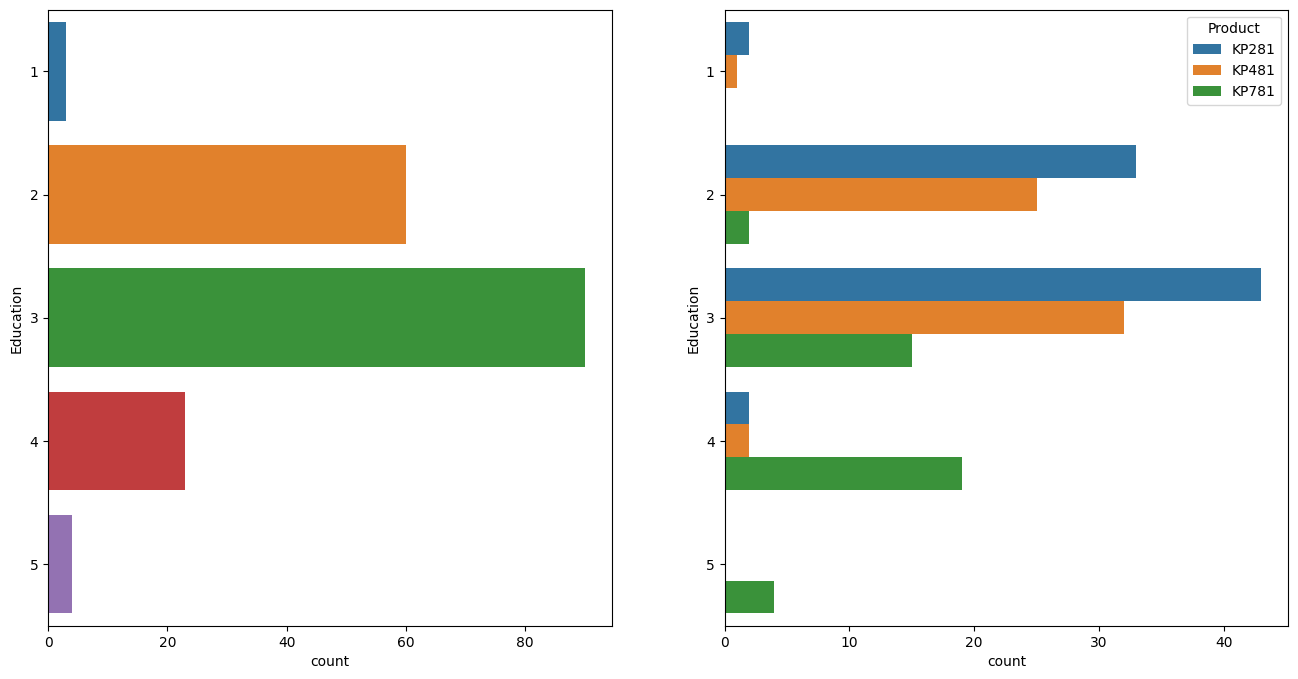

In [ ]:
plt.figure(figsize = (16,8))
plt.subplot(1,2,1)
sns.countplot(data=dataC,y="Education")
plt.subplot(1,2,2)
sns.countplot(data=dataC,y="Education",hue= "Product")
plt.show

* Customers with Education year [15,16] are the major qty customer
* KP281,KP481 are majorly preferred by customer with education year < 16
* KP781 is majorly prefered by customers with education year >= 16

**Age**

<Axes: xlabel='Age', ylabel='Count'>

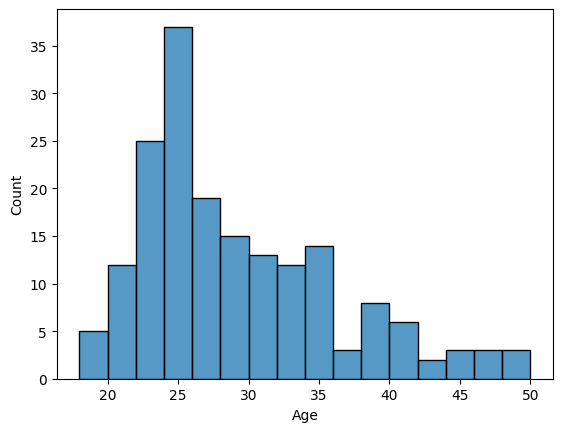

In [ ]:
sns.histplot(data["Age"], bins = 16)

Converting Age into Categories
* 18 ~ 20 --> Tens
* 21 ~ 30 --> Twenties
* 31 ~ 40 --> Thities
* 41 ~ 50 --> Fourties

In [ ]:
dataC["Age"] = pd.cut(data["Age"],bins=[10,20,30,40,50],labels=["Tens","Twenties","Thirties","Fourties"],right = True)

<Axes: xlabel='Age', ylabel='Density'>

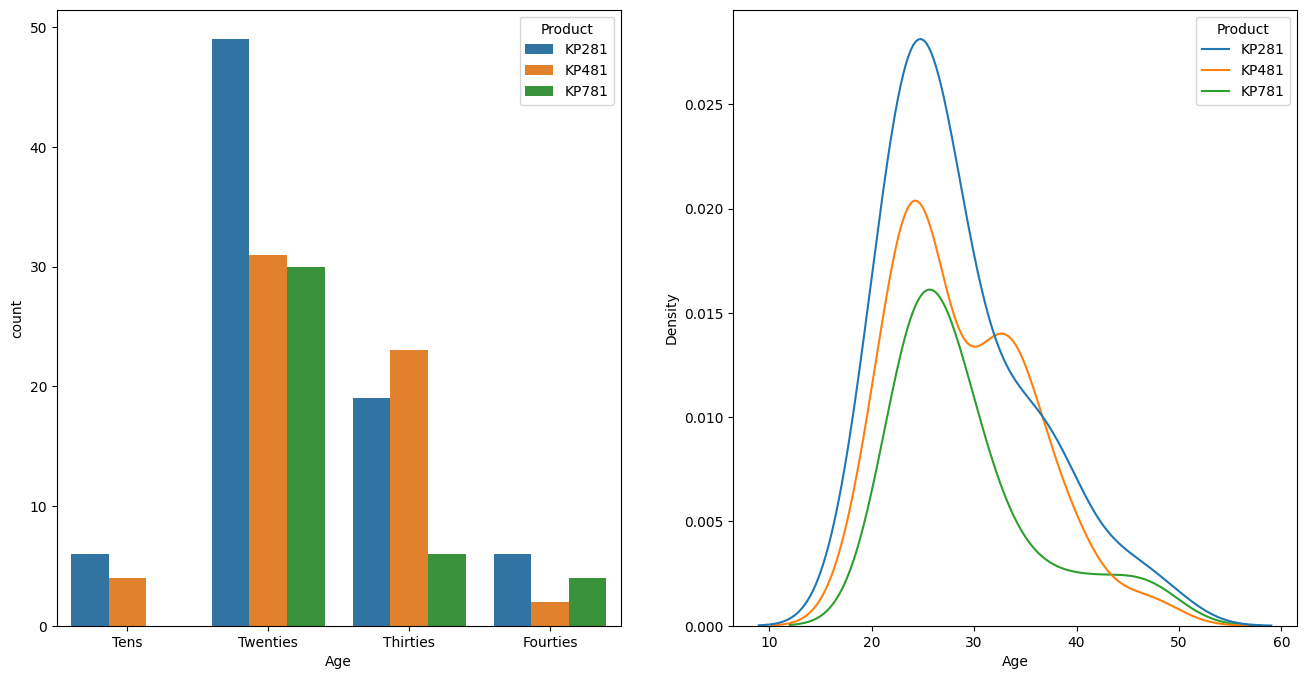

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.countplot(data=dataC, x="Age", hue = "Product")
plt.subplot(1,2,2)
sns.kdeplot(data= data, x=data["Age"],hue="Product")

* Twenties majorly prefers KP281
* KP481 is preferred by Twenties and however Customers in Thirties Majorly prefer it
* KP781 is majorly prefered by twenties

**Marital Status**

<function matplotlib.pyplot.show(close=None, block=None)>

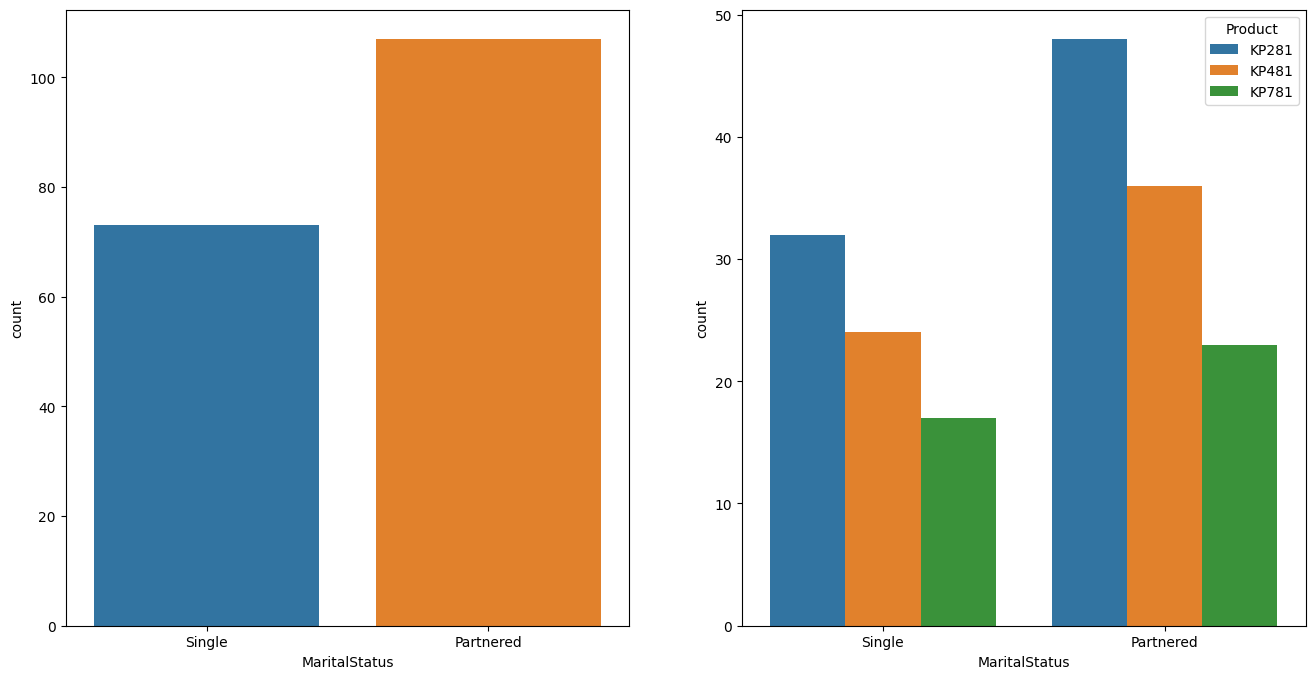

In [ ]:
plt.figure(figsize = (16,8))
plt.subplot(1,2,1)
sns.countplot(data=data, x="MaritalStatus")
plt.subplot(1,2,2)
sns.countplot(data=data, x="MaritalStatus",hue= "Product")
plt.show

* Parterned are the Major Customer Base
* However Product Selection has no impact of Marital Status

**Usage (No of Times used in a week)**

<function matplotlib.pyplot.show(close=None, block=None)>

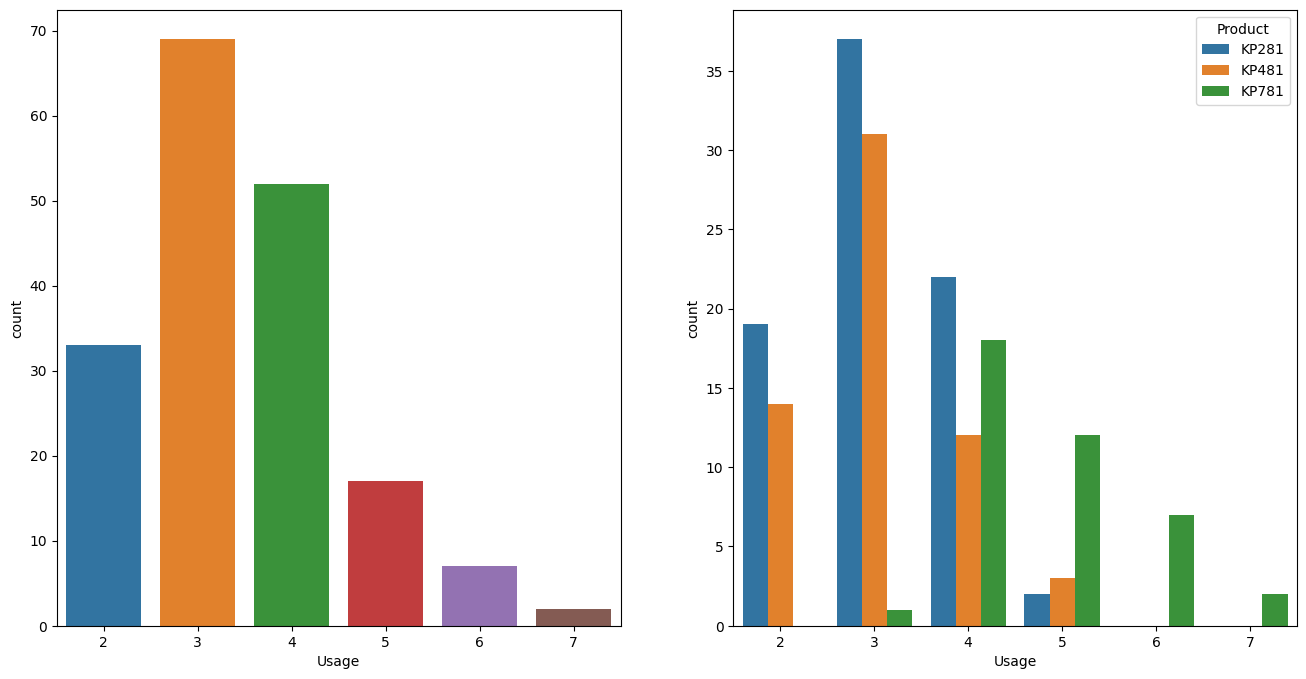

In [ ]:
plt.figure(figsize = (16,8))
plt.subplot(1,2,1)
sns.countplot(data=data, x="Usage")
plt.subplot(1,2,2)
sns.countplot(data=data, x="Usage",hue= "Product")
plt.show

* Customer with weekly usage <=3 prefer KP281 & KP481
* Customer with weekly usage >=5 prefer KP781

**Fitness**

<function matplotlib.pyplot.show(close=None, block=None)>

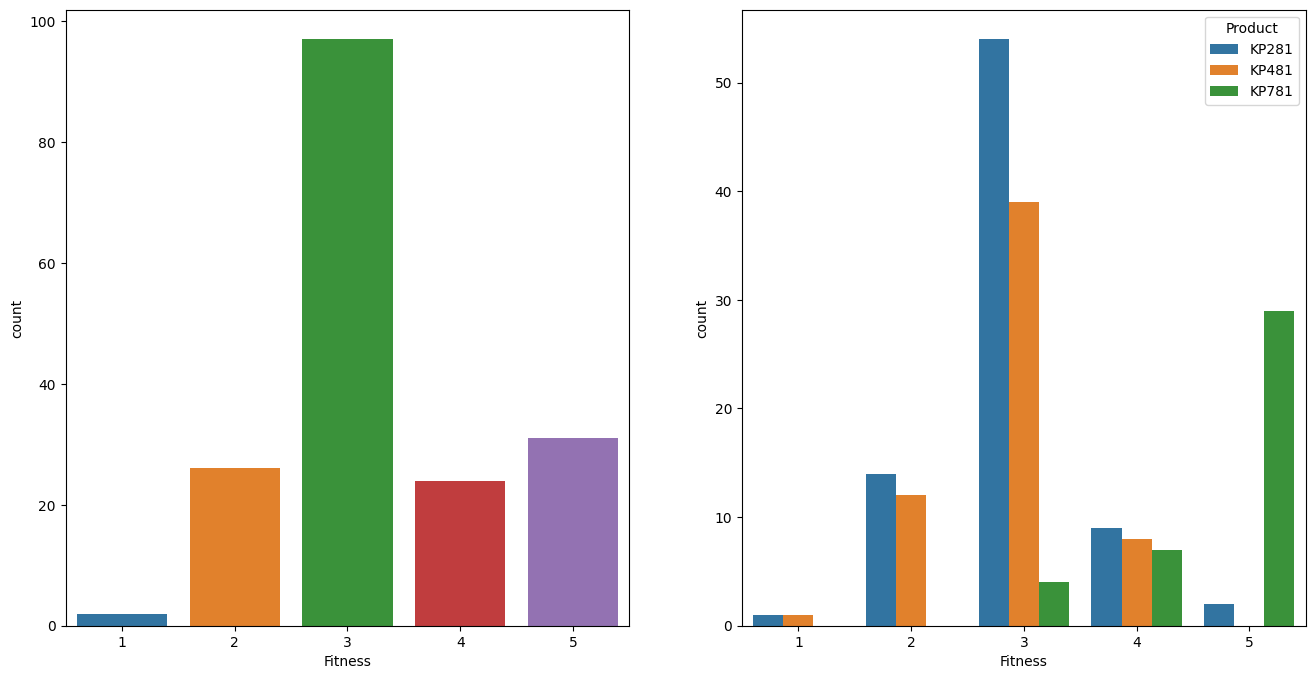

In [ ]:
plt.figure(figsize = (16,8))
plt.subplot(1,2,1)
sns.countplot(data=data, x="Fitness")
plt.subplot(1,2,2)
sns.countplot(data=data, x="Fitness",hue= "Product")
plt.show

* Majority of Customer rate theit fitness as "3"
* Customers rating themselves >=3 prefer KP281 & KP481
* Customers ratings themselves as "5" prefer to buy KP781

**Income**

<Axes: xlabel='Income', ylabel='Count'>

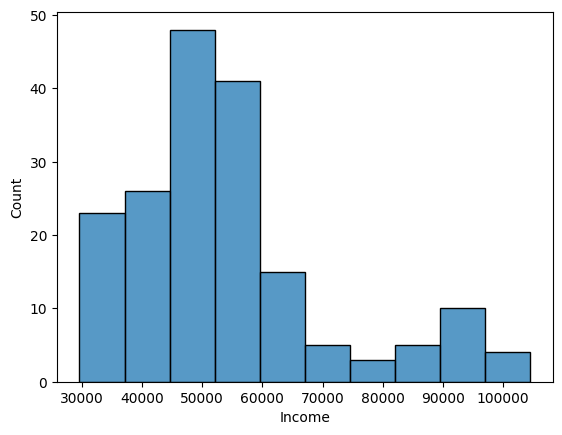

In [ ]:
sns.histplot(data= data ,x = data["Income"], bins = 10)

Converting Income into Catogories  base on the Histogram Plot
* 25000 ~ 45000 --> low
* 45000 ~ 70000 --> Medium
* 70000 ~ 90000 --> High
* 90000 ~ 110000 --> Very High

In [ ]:
dataC["Income"] = pd.cut(data["Income"],bins=[25000,45000,70000,90000,110000],labels=["Low","Medium","High","Very High"],right = True)

<Axes: xlabel='Income', ylabel='Density'>

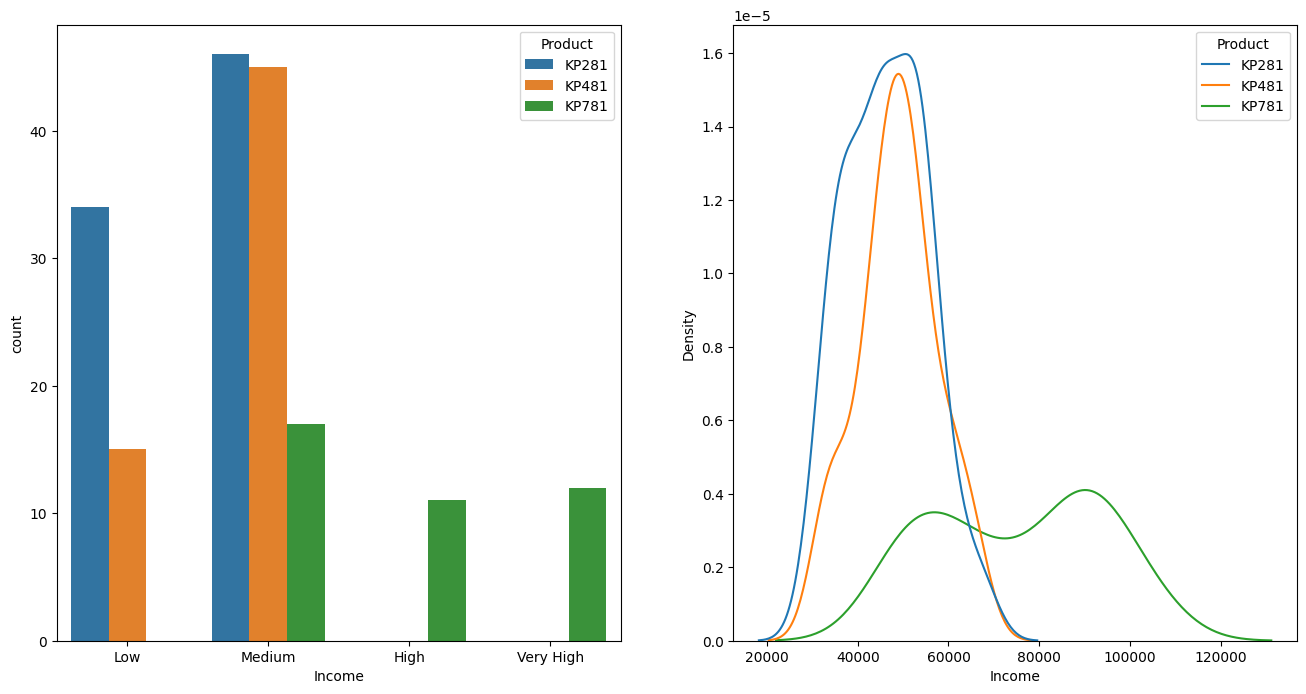

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.countplot(data=dataC,x="Income",hue="Product")
plt.subplot(1,2,2)
sns.kdeplot(data=data,x="Income",hue="Product")

* Customers with income > 75000 prefer to buy KP781
* Customers with Income [45000,70000] equally prefer KP281,KP481
* Customer with income < 45000 prefer KP281

<Axes: xlabel='Miles', ylabel='Count'>

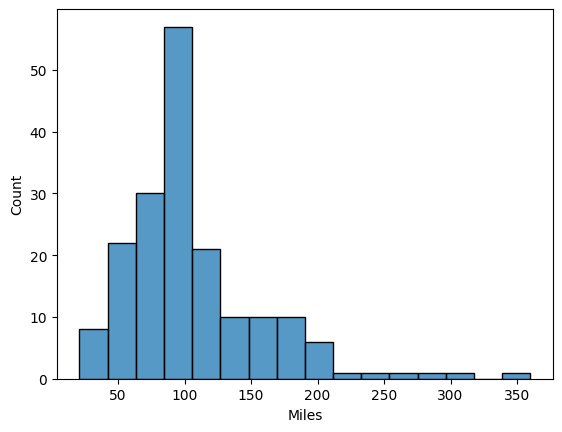

In [ ]:
sns.histplot(data["Miles"], bins = 16)

Converting Miles into Catogories base on the Histogram Plot
* 0 ~ 75 --> low
* 75 ~ 150 --> Medium
* 150 ~ 225 --> High
* 225 ~ 375 --> Very High

In [ ]:
dataC["Miles"] = pd.cut(data["Miles"],bins=[0,75,150,225,375],labels=["low","Medium","High","Very High"],right = True)

<Axes: xlabel='Miles', ylabel='Density'>

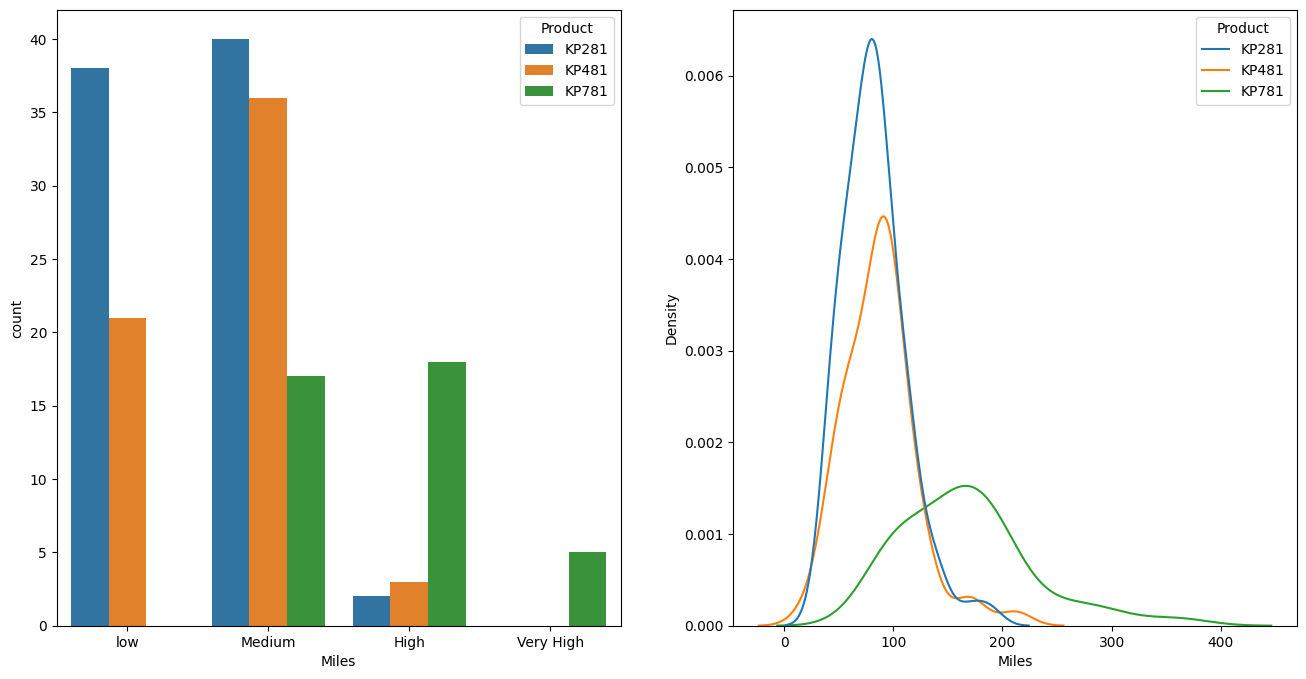

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.countplot(data=dataC,x="Miles",hue="Product")
plt.subplot(1,2,2)
sns.kdeplot(data=data,x="Miles",hue="Product")

* Customers with Miles > 225 prefer to buy KP781
* Customers with Miles [75,150]  equally prefers KP281, KP481 & next prefers KP781
* Customers with Miles < 75 highly prefers KP281 and next KP481 but never KP781

In [ ]:
dataC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    object  
 1   Age            180 non-null    category
 2   Gender         180 non-null    object  
 3   Education      180 non-null    category
 4   MaritalStatus  180 non-null    object  
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    category
 8   Miles          180 non-null    category
dtypes: category(4), int64(2), object(3)
memory usage: 8.7+ KB


In [ ]:
print ("Category : Nunique , Max , Min")
print("-------------------------------")
for i in dataC.columns:
  print(i, ":", dataC[i].nunique(),",", dataC[i].max(),",",dataC[i].min())

Category : Nunique , Max , Min
-------------------------------
Product : 3 , KP781 , KP281
Age : 4 , Fourties , Tens
Gender : 2 , Male , Female
Education : 5 , 5 , 1
MaritalStatus : 2 , Single , Partnered
Usage : 6 , 7 , 2
Fitness : 5 , 5 , 1
Income : 4 , Very High , Low
Miles : 4 , Very High , low


# **Bussiness Insights**

# **Recommendations**